# 제목

In [3]:
import re
from string import punctuation
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import nltk
nltk.download('averaged_perceptron_tagger')

pattern = re.compile(r"[%s]" % re.escape(punctuation))
# pattern

sentence = "She sells seashells in the seashore"
sentence = pattern.sub("", sentence)

tagged = pos_tag(word_tokenize(sentence.lower()))
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\brsta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('she', 'PRP'),
 ('sells', 'VBZ'),
 ('seashells', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('seashore', 'NN')]

In [4]:
result=[]
for word in tagged:
    if word[1] in ["IN", "DT"]:
        print("Skipped")
    else:
        print(word[0])
        result.append(word[0])
        
print(word_tokenize(sentence))
print(tagged)

she
sells
seashells
Skipped
Skipped
seashore
['She', 'sells', 'seashells', 'in', 'the', 'seashore']
[('she', 'PRP'), ('sells', 'VBZ'), ('seashells', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('seashore', 'NN')]


In [5]:
from nltk.help import brown_tagset, upenn_tagset
nltk.download('tagsets')

brown_tagset() # 특정 글자가 보고 싶은 경우 입력
upenn_tagset("N.*?")

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\brsta\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [6]:
from nltk import Text

textObj = Text(tagged)
textObj.vocab().most_common()

[(('she', 'PRP'), 1),
 (('sells', 'VBZ'), 1),
 (('seashells', 'NNS'), 1),
 (('in', 'IN'), 1),
 (('the', 'DT'), 1),
 (('seashore', 'NN'), 1)]

In [7]:
textObj.vocab().N(), textObj.vocab(),freq("the", "DT")
# 저빈도 단어, 고빈도 단어 삭제

NameError: name 'freq' is not defined

In [ ]:
for key in textObj.vocab().keys():
    if textObj.vocab().freq(key) > 0.2:
        print("skipped ")

In [8]:
from nltk.probability import FreqDist
from collections import defaultdict

taggedWords = FreqDist()
taggedDict = FreqDist()

for term in tagged:
    taggedWords[term] += 1
    taggedDict[term] += 1 

In [9]:
from nltk.corpus import gutenberg

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
pattern.sub("", corpus)
tagged = pos_tag(word_tokenize(corpus))
original = Text(word_tokenize(corpus))
textObj = Text
wordList = Text([pair[0] for pair in tagged])
posList = Text([pair[1] for pair in tagged])

In [10]:
original.vocab().N(10), textObj.vocab().N(15), wordList.vocab().N(), posList.vocab().N()

TypeError: N() takes 1 positional argument but 2 were given

In [ ]:
import matplotlib.pyplot as plt

x = range(1, 51)
y = [pair[1] for pair in original.vocab().most_common(50)] # 빈도
yy = [pair[1] for pair in textObj.vocab().most_common(50)] 
yyy = [pair[1] for pair in wordList.vocab().most_common(50)] 

plt.plot(x, y, "r-")
plt.plot(x, yy, "g-")
plt.plot(x, yyy, "b-")
plt.show()

In [ ]:
sentence = "내 친구는 잠을 많이 잔다. ㅋㅋ, 극혐"

In [ ]:
from konlpy.tag import Hannanum

han = Hannanum()
han.morphs(sentence) 
print(han.pos(sentence))

In [ ]:
from konlpy.tag import Okt, Kkma 
# 트위터에서 한국어 분석을 위해 만든 패키지
okt = Okt()
kkm = Kkma()
okt.morphs(sentence)
print(kkm.pos(sentence))

In [ ]:
# 성능 비교
# 많이라는 부사로 테스트(품사 태깅)
# Kkma, komoran, okt > Hannanum

# 많이(부사) =? 품시태깅
# Kkma, komoran, okt > Hannanum

# 'ㅋㅋ'같은 신조어 처리
# Okt, Hannanum > Kkma, Komoran

# 명사 (불용어) - 신조어 무시
# Komoran > Hannaum > Okt > Kkma

In [ ]:
from nltk.probability import FreqDist
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = word_tokenize(corpus)
tagged = kkm.pos(corpus)

In [ ]:
freqTokens = FreqDist()
freqTagged = FreqDist()

for token in tokens:
    freqTokens[token] += 1

freqTokens = FreqDist()

for token in tagged:
    freqTagged[token] +=1

# word 단위, 품사 단위로 쪼개보기
freqWord = FreqDist()
for token in tagged:
    freqWord[token[0]] +=1

freqPos = FreqDist()
for token in tagged:
    freqPos[token[0]] +=1

In [ ]:
freqTagged.N(), freqWord.N()

In [ ]:
# 구두점, 부사류만 제거
filteredList = FreqDist()
for token in freqTagged: # tupple(단어, 품사)
    if token[1] not in ["JKG", "JKO", "SP"]: # 제거하고 싶은 품사 
        filteredList[token] = freqTagged[token]

In [ ]:
freqTagged.N(), freqTagged.most_common(50)

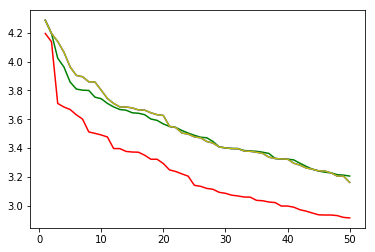

In [17]:
from konlpy.tag import Okt, Kkma 
import matplotlib.pyplot as plt
# 형태소분석을 한 것이 좀 더 선형에 가까운 그래프를 보여준다. 
# 형태소분석을 거치고 난 결과값이 더 균등하므로 학습에 유리하다. 
import math, os
kkm = Kkma()

# 14일에 수집했던 뉴스 기사들에 대해 형태소 분석 후 그래프 그려보기
for file in os.listdir("./0314_DownloadedNewstxts"):
    if file.endswith(".txt"):
        with open("./0314_DownloadedNewstxts/" + file, encoding = "utf-8") as f:
            corpus += f.read()
            
tokens = word_tokenize(corpus)
tagged = kkm.pos(corpus)
freqTokens = FreqDist()

freqTokens = FreqDist()
for token in tokens:
    freqTokens[token] += 1

freqTagged = FreqDist()
for token in tagged:
    freqTagged[token] +=1

# word 단위, 품사 단위로 쪼개보기
freqWord = FreqDist()
for token in tagged:
    freqWord[token[0]] +=1

freqPos = FreqDist()
for token in tagged:
    freqPos[token[0]] +=1    

x = range(1, 51)
y = [pair[1] for pair in freqTokens.most_common(50)] # 빈도
yy = [pair[1] for pair in freqTagged.most_common(50)] 
yyy = [pair[1] for pair in freqWord.most_common(50)] 
xx = range(1, 31)
yyyy = [pair[1] for pair in freqPos.most_common(50)] 

_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]
_yyyy = [math.log10(_) for _ in yyyy]

plt.plot(x, _y, "r-")
plt.plot(x, _yy, "g-")
plt.plot(x, _yyy, "b-")
plt.plot(x, _yyyy, "y-")
plt.show()

In [44]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.corpus import gutenberg
from konlpy.corpus import kolaw, kobill
from string import  punctuation
import re

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
# corpus = kolaw.open(kolaw.fileids()[0]).read()
# corpus=""
for file in kobill.fileids():
    corpus += kobill.open(kobill.fileids())

corpus = kobill.open(kobill.fileids()[0]).read()
corpus = re.sub(r"[%s]" % re.escape(punctuation), " ", corpus)

FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\brsta\\Anaconda3\\lib\\site-packages\\konlpy/data/corpus/kobill/['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']"

In [42]:
tokens = word_tokenize(corpus)
result = []
for term in tokens:
    result.extend(kkm.pos(term))
bigram = BigramCollocationFinder.from_words(result) # bigram 객체 생성
measure = BigramAssocMeasures()

In [43]:
# bigram.nbest(measure.pmi, 10) # 제일 무난한 통계 기법. 감성 분석에도 응용됨. 
bigram.nbest(measure.chi_sq, 10) # 제일 무난한 통계 기법. 감성 분석에도 응용됨. 

[(('``', 'SW'), ('나', 'NP')),
 (('강제', 'NNG'), ('노역', 'NNG')),
 (('경자', 'NNG'), ('유전', 'NNG')),
 (('공중', 'NNG'), ('도덕', 'NNG')),
 (('교전', 'NNG'), ('상태', 'NNG')),
 (('기본적', 'NNG'), ('인권', 'NNG')),
 (('내부', 'NNG'), ('규율', 'NNG')),
 (('누구', 'NP'), ('든지', 'JX')),
 (('다수', 'NNG'), ('표', 'NNG')),
 (('담임', 'NNG'), ('권', 'XSN'))]